In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置浮点数的显示格式，不显示小数点后的数字
pd.options.display.float_format = "{:.0f}".format

In [31]:
df = pd.read_csv('F:\BaiduSyncdisk\Shengyou-Casual\S 数据分析\Python Data Analysis\Level_230704.csv')

In [32]:
#第一步 清洗数据#

# 删除 ActiveRegion 或 Country 字段等于 "China" 或 "Shanghai" 的数据
# 使用 ~ 符号代表逻辑非操作，& 代表逻辑与操作，| 代表逻辑或操作
mask = ~((df['ActiveRegion'] == 'China') | (df['ActiveRegion'] == 'Shanghai') |
          (df['Region'] == 'China'))

# 使用布尔索引来筛选出不满足条件的行
df = df.loc[mask]

# 删除 AccCreateTime 和 CreateTime 至少一列有空值的行
df = df.dropna(subset=['AccCreateTime', 'CreateTime'])


# 将带有逗号分隔符的字段转化为纯数值字段
df['AccCreateTime'] = df['AccCreateTime'].str.replace(',', '').astype(int)
df['CreateTime'] = df['CreateTime'].str.replace(',', '').astype(int)
df['LevelEndTime'] = df['LevelEndTime'].str.replace(',', '').astype(int)
df['LevelStartTime'] = df['LevelStartTime'].str.replace(',', '').astype(int)
df['ConsumeGold'] = df['ConsumeGold'].str.replace(',', '').astype(int)

# 将BuyBolts从布尔值转换为数值型
df['BuyBolts'] = df['BuyBolts'].astype(int)
df['BuyTimer'] = df['BuyTimer'].astype(int)

# 使用pd.to_datetime()将Unix时间戳转换为时间类型
df['AccCreateTime'] = pd.to_datetime(df['AccCreateTime'], unit='s')  # 秒为单位
df['CreateTime'] = pd.to_datetime(df['CreateTime'], unit='s')  # 秒为单位
df['LevelEndTime'] = pd.to_datetime(df['LevelEndTime'], unit='s')  # 秒为单位
df['LevelStartTime'] = pd.to_datetime(df['LevelStartTime'], unit='s')  # 秒为单位

# 计算Duration，单位为秒
df['Duration'] = (df['LevelEndTime'] - df['LevelStartTime']).dt.total_seconds()

# 计算WinRatio，转化为百分比
df['WinRatio'] = (df['Prograss'] / df['Target']) * 100
# 避免除以0的错误
df['WinRatio'] = np.nan_to_num((df['Prograss'] / df['Target']) * 100, nan=0)

#新增字段CoinSink
df['CoinSink'] = df['UseWind'] * 600 + df['UseSand'] * 800 + df['UseMag'] * 1000 + df['UseBroom'] * 800 + df['RevivalCoin'] + df['RevivalAds'] * 1000
df['ReviveCoinSink'] = df['RevivalCoin'] + df['RevivalAds'] * 1000


In [33]:
# 查看清洗后的数据
print(df.head())  # 打印前5行数据
print(df.info())  # 获取数据集的信息，包括每列的数据类型、非空值数量等

         AccCreateTime ActiveRegion  BuyBolts  BuyTimer            City  \
0  2024-07-01 01:06:43  Philippines         0         0       Biu00f1an   
1  2024-07-04 10:02:29  Philippines         0         0  Cagayan de Oro   
2  2024-07-01 01:06:43  Philippines         0         0       Biu00f1an   
9  2024-06-30 21:09:21  Philippines         0         0      Davao City   
11 2024-06-30 21:09:21  Philippines         0         0      Davao City   

    ClickTime  ConsumeGold                  CreateDate          CreateTime  \
0          67            0  Jul 4, 2024 @ 18:50:40.000 2024-07-04 10:50:40   
1          19            0  Jul 4, 2024 @ 18:49:32.000 2024-07-04 10:49:32   
2         157            0  Jul 4, 2024 @ 18:47:29.000 2024-07-04 10:47:29   
9         119            0  Jul 4, 2024 @ 18:41:23.000 2024-07-04 10:41:23   
11         22            0  Jul 4, 2024 @ 18:38:21.000 2024-07-04 10:38:21   

    CurrentLevel  ... UserID Version  WinStreak                   _id  \
0      

   CurrentLevel  LevelStreak
0             1            1
1             2            1
2             3            1
3             4            1
4             5            1


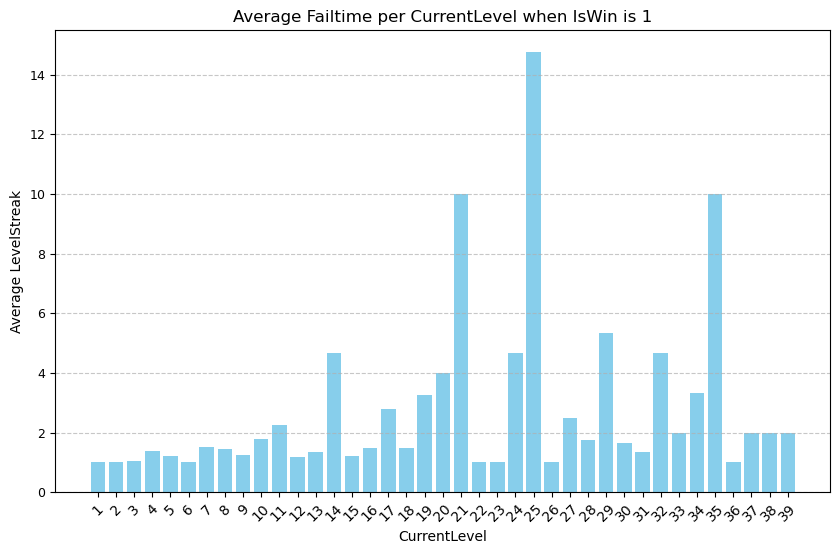

In [34]:
#绘制柱状图，绘制每个关卡的平均人均尝试通过次数
import pandas as pd
import matplotlib.pyplot as plt

# 筛选IsWin为1的记录
df_iswin = df[df['IsWin'] == 1]

# 按照CurrentLevel分组，并计算LevelStreak的人均次数
average_streaks = df_iswin.groupby('CurrentLevel')['LevelStreak'].mean().reset_index()

print(average_streaks.head())  # 打印前5行数据

# 绘制柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小
bars = plt.bar(average_streaks['CurrentLevel'], average_streaks['LevelStreak'], color='skyblue')

# 设置图表标题和坐标轴标签
plt.title('Average Failtime per CurrentLevel when IsWin is 1')
plt.xlabel('CurrentLevel')
plt.ylabel('Average LevelStreak')

# 设置x轴和y轴的刻度显示方式
plt.xticks(average_streaks['CurrentLevel'], rotation=45)  # 旋转x轴标签
plt.yticks(fontsize=9)  # 设置y轴刻度字体大小

# 显示横纵坐标值的网格
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()  # 显示图表

In [35]:
print(df.columns)

Index(['AccCreateTime', 'ActiveRegion', 'BuyBolts', 'BuyTimer', 'City',
       'ClickTime', 'ConsumeGold', 'CreateDate', 'CreateTime', 'CurrentLevel',
       'DeviceID', 'Event', 'Hardness', 'IsWin', 'LastPay', 'LastPayTime',
       'LevelEndTime', 'LevelPay', 'LevelStartTime', 'LevelStreak',
       'LevelTime', 'LoseReason', 'Platform', 'Prelevelads', 'Prograss',
       'Region', 'ResVersion', 'RevivalAds', 'RevivalCoin', 'Reward',
       'Reward.keyword', 'Target', 'TotalPay', 'UseBroom', 'UseMag', 'UseSand',
       'UseWind', 'UserID', 'Version', 'WinStreak', '_id', '_index', '_score',
       'Duration', 'WinRatio', 'CoinSink', 'ReviveCoinSink'],
      dtype='object')


   CurrentLevel  AvgCoinSink  AvgReviveCoinSink  FailCount
0             1            0                  0          1
1             2            0                  0          1
2             3         1246                  0          1
3             4          132                  0          2
4             5         1093                 14          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CurrentLevel       40 non-null     int64  
 1   AvgCoinSink        40 non-null     float64
 2   AvgReviveCoinSink  40 non-null     float64
 3   FailCount          40 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB
None
   CurrentLevel  AvgCoinSink  AvgReviveCoinSink  FailCount
0             1            0                  0          1
1             2            0                  0          1
2             3         

Text(0, 0.5, 'AvgCoinSink')

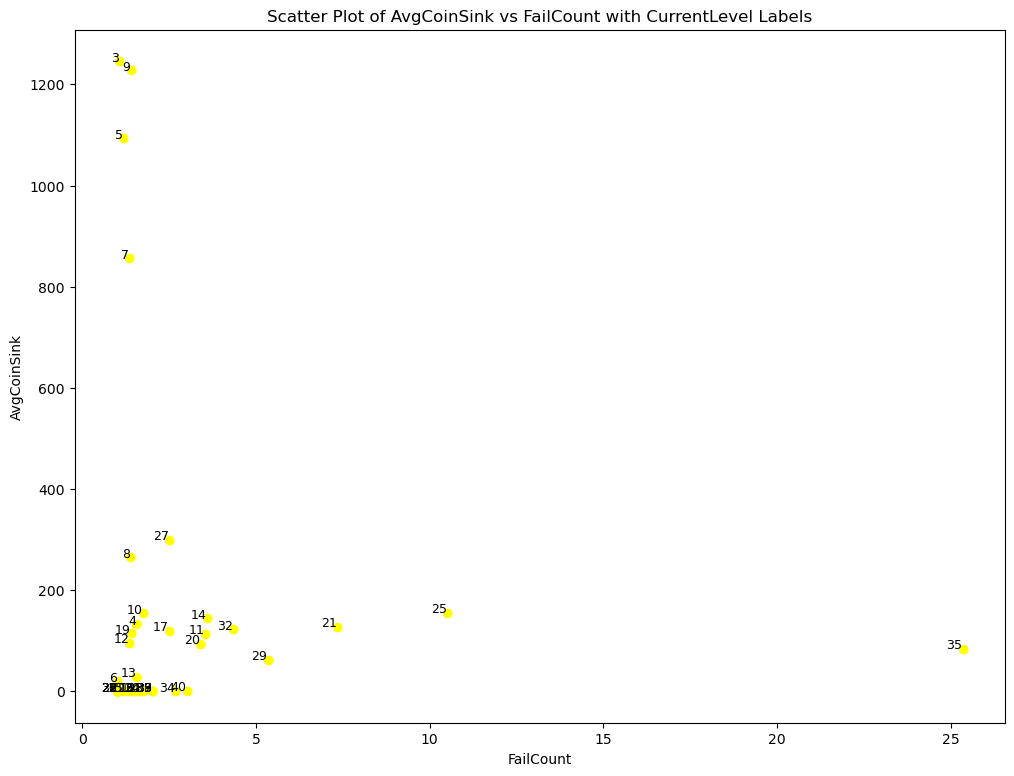

In [36]:
#分析Sink-难度#

# 计算每个CurrentLevel的CoinSink平均值
avg_coinsink = df.groupby('CurrentLevel')['CoinSink'].mean().reset_index()
avg_coinsink.rename(columns={'CoinSink': 'AvgCoinSink'}, inplace=True)

# 计算每个CurrentLevel的ReviveCoinSink平均值
avg_revivesink = df.groupby('CurrentLevel')['ReviveCoinSink'].mean().reset_index()
avg_revivesink.rename(columns={'ReviveCoinSink': 'AvgReviveCoinSink'}, inplace=True)

# 计算每个人每个CurrentLevel的数据条数（FailCount）
# 使用groupby对DeviceID和CurrentLevel进行分组，并计算每组的大小
fail_count = df.groupby(['DeviceID', 'CurrentLevel']).size().reset_index(name='Count')
# 计算平均值
fail_count_avg = fail_count.groupby('CurrentLevel')['Count'].mean().reset_index()
fail_count_avg.rename(columns={'Count': 'FailCount'}, inplace=True)

# 合并AvgCoinSink、AvgReviveCoinSink和FailCount
df_Sink = pd.merge(avg_coinsink, avg_revivesink, on='CurrentLevel')
df_Sink = pd.merge(df_Sink, fail_count_avg, on='CurrentLevel')

# 查看清洗后的数据
print(df_Sink.head())  # 打印前5行数据
print(df_Sink.info())  # 获取数据集的信息，包括每列的数据类型、非空值数量等


# 查看清洗后的数据
print(df_Sink.head())  # 打印前5行数据
print(df_Sink.info())  # 获取数据集的信息，包括每列的数据类型、非空值数量等

# 创建一个图形和坐标轴
plt.figure(figsize=(12, 9))

# 绘制散点图
plt.scatter(df_Sink['FailCount'], df_Sink['AvgCoinSink'], color='yellow')

# 在每个点上添加文本标签，确保CurrentLevel转换为整数
for i, row in df_Sink.iterrows():
    plt.text(df_Sink['FailCount'][i], df_Sink['AvgCoinSink'][i],
             str(int(row["CurrentLevel"])),  # 转换为整数并转换为字符串
             fontsize=9, ha='right')

# 设置图表标题和坐标轴标签
plt.title('Scatter Plot of AvgCoinSink vs FailCount with CurrentLevel Labels')
plt.xlabel('FailCount')
plt.ylabel('AvgCoinSink')


Text(0, 0.5, 'AvgReviveCoinSink')

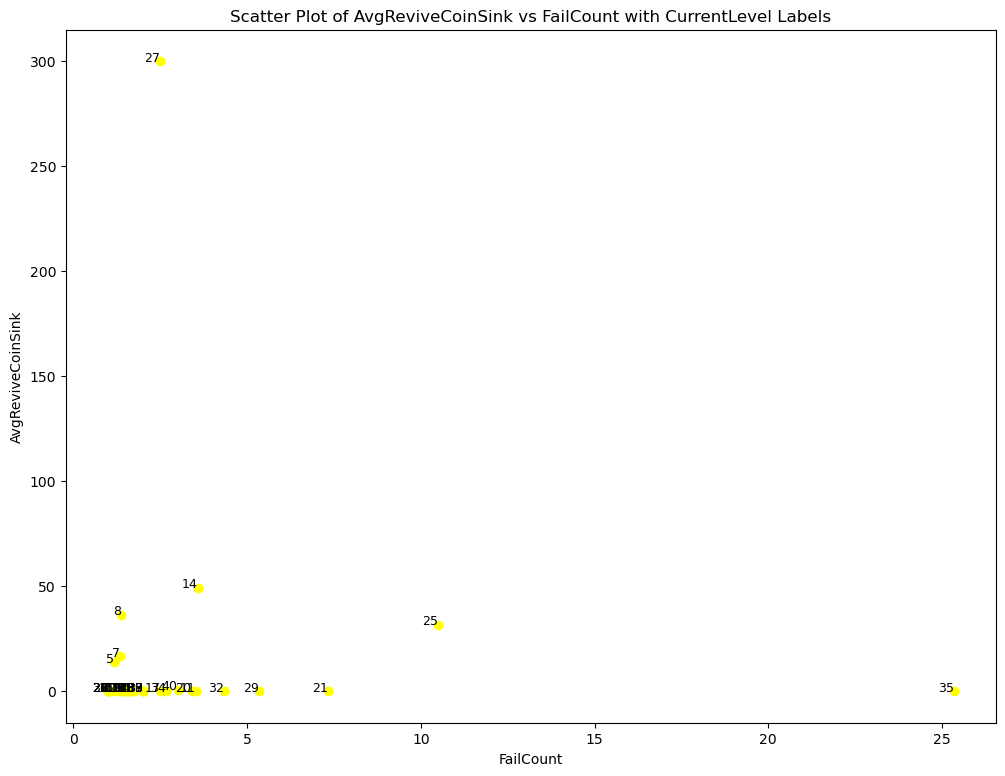

In [37]:
# 创建一个图形和坐标轴
plt.figure(figsize=(12, 9))

# 绘制FailCount X ReviveCoinSink散点图
plt.scatter(df_Sink['FailCount'], df_Sink['AvgReviveCoinSink'], color='yellow')

# 在每个点上添加文本标签，确保CurrentLevel转换为整数
for i, row in df_Sink.iterrows():
    plt.text(df_Sink['FailCount'][i], df_Sink['AvgReviveCoinSink'][i],
             str(int(row["CurrentLevel"])),  # 转换为整数并转换为字符串
             fontsize=9, ha='right')

# 设置图表标题和坐标轴标签
plt.title('Scatter Plot of AvgReviveCoinSink vs FailCount with CurrentLevel Labels')
plt.xlabel('FailCount')
plt.ylabel('AvgReviveCoinSink')

In [39]:
df_Sink.to_excel('df_Sink.xlsx', index=False, engine='openpyxl')